# Forecasting Net Prophet

You’re a growth analyst at [MercadoLibre](http://investor.mercadolibre.com/about-us). With over 200 million users, MercadoLibre is the most popular e-commerce site in Latin America. You've been tasked with analyzing the company's financial and user data in clever ways to make the company grow. So, you want to find out if the ability to predict search traffic can translate into the ability to successfully trade the stock.

The instructions for this Challenge are divided into four steps, as follows:

* Step 1: Find unusual patterns in hourly Google search traffic

* Step 2: Mine the search traffic data for seasonality

* Step 3: Relate the search traffic to stock price patterns

* Step 4: Create a time series model with Prophet

The following subsections detail these steps.

## Install and import the required libraries and dependencies

In [1]:
# Install the required libraries
!pip install prophet

In [2]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Step 1: Find Unusual Patterns in Hourly Google Search Traffic

The data science manager asks if the Google search traffic for the company links to any financial events at the company. Or, does the search traffic data just present random noise? To answer this question, pick out any unusual patterns in the Google search data for the company, and connect them to the corporate financial events.

To do so, complete the following steps:

1. Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

2. Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?


#### Step 1: Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

In [3]:
# Store the data in a Pandas DataFrame
# Set the "Date" column as the Datetime Index.

df_mercado_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date', 
    parse_dates=True, 
    infer_datetime_format=True
).dropna()

# Review the first and last five rows of the DataFrame
display(df_mercado_trends.head())
display(df_mercado_trends.tail())

/var/folders/3q/99hxw4lx4hlcnzc_c4tymsh80000gn/T/ipykernel_37665/1096498906.py:4: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_mercado_trends = pd.read_csv(
/var/folders/3q/99hxw4lx4hlcnzc_c4tymsh80000gn/T/ipykernel_37665/1096498906.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mercado_trends = pd.read_csv(


,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38


,Search Trends
Date,
2020-09-07 20:00:00,71
2020-09-07 21:00:00,83
2020-09-07 22:00:00,96
2020-09-07 23:00:00,97
2020-09-08 00:00:00,96


In [4]:
# Review the data types of the DataFrame using the info function
df_mercado_trends.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37106 entries, 2016-06-01 00:00:00 to 2020-09-08 00:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Search Trends  37106 non-null  int64
dtypes: int64(1)
memory usage: 579.8 KB


<Axes: xlabel='Date'>

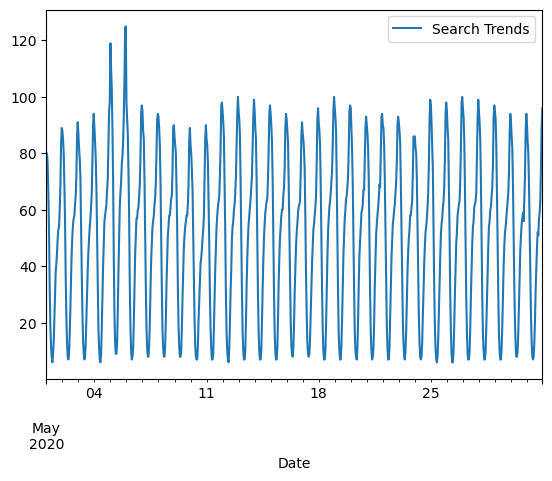

In [5]:
# Slice the DataFrame to just the month of May 2020
may_2020_data = df_mercado_trends[(df_mercado_trends.index >= '2020-05-01') & (df_mercado_trends.index < '2020-06-01')]
# Plot to visualize the data for May 2020
may_2020_data.plot()

#### Step 2: Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?

In [6]:
# Calculate the sum of the total search traffic for May 2020
traffic_may_2020 = may_2020_data['Search Trends'].sum()

# View the traffic_may_2020 value
print(traffic_may_2020)

38181


In [7]:
# Calcluate the monthly median search traffic across all months 
# Group the DataFrame by index year and then index month, chain the sum and then the median functions
median_monthly_traffic = df_mercado_trends.groupby([df_mercado_trends.index.year, df_mercado_trends.index.month]).sum().median()

# Print the grouped data
print(median_monthly_traffic)

# View the median_monthly_traffic value

Search Trends    35172.5
dtype: float64


In [8]:
# To compare the seach traffic for the month of May 2020 to the overall monthly median value,
# Divide the may traffic total by the median monthly traffic
traffic_may_2020/median_monthly_traffic

Search Trends    1.085536
dtype: float64

##### Answer the following question: 

**Question:** Did the Google search traffic increase during the month that MercadoLibre released its financial results?

**Answer:** Yes, they experienced 8% more traffic than their median traffic.

## Step 2: Mine the Search Traffic Data for Seasonality

Marketing realizes that they can use the hourly search data, too. If they can track and predict interest in the company and its platform for any time of day, they can focus their marketing efforts around the times that have the most traffic. This will get a greater return on investment (ROI) from their marketing budget.

To that end, you want to mine the search traffic data for predictable seasonal patterns of interest in the company. To do so, complete the following steps:

1. Group the hourly search data to plot the average traffic by the hour of day. Does the search traffic peak at a particular time of day or is it relatively consistent?

2. Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday). Does the search traffic get busiest on any particular day of the week?

3. Group the hourly search data to plot the average traffic by the week of the year. Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?


#### Step 1: Group the hourly search data to plot the average traffic by the hour of the day.

<Axes: xlabel='hour'>

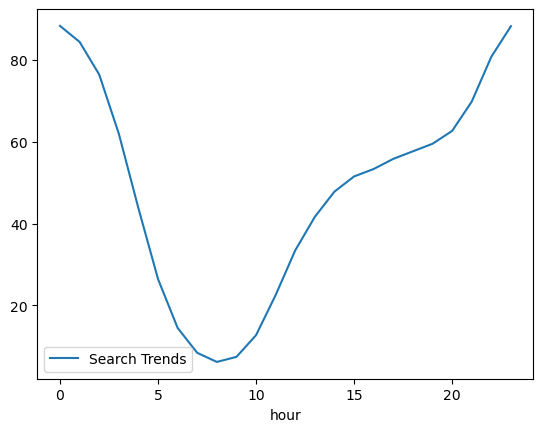

In [9]:
# Group the hourly search data to plot the average traffic by the day of week 
df_mercado_trends["hour"] = df_mercado_trends.index.hour
hourly_traffic = df_mercado_trends.groupby("hour").mean()
# Plot the average traffic by the hour
hourly_traffic.plot()

#### Step 2: Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday).

<Axes: xlabel='day'>

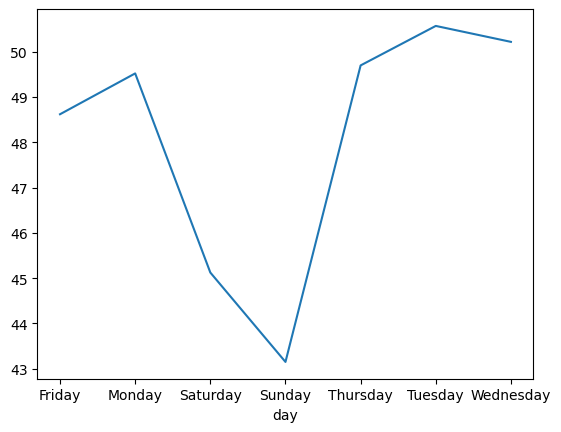

In [10]:
# Group the hourly search data to plot the average traffic by the day of week 
df_mercado_trends["day"] = df_mercado_trends.index.day_name()
daily_traffic = df_mercado_trends.groupby("day")['Search Trends'].mean()
# Plot the average traffic by the hour
daily_traffic.plot()

#### Step 3: Group the hourly search data to plot the average traffic by the week of the year.

<Axes: xlabel='week_of_year'>

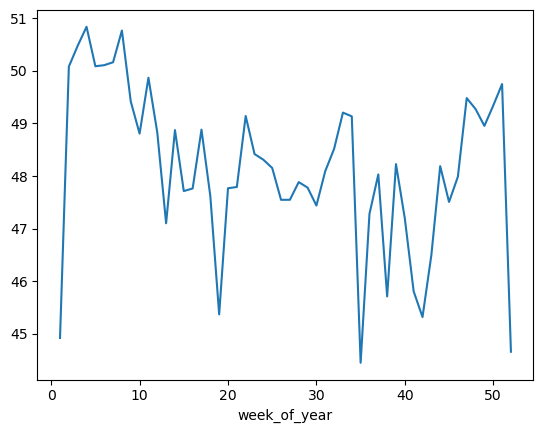

In [11]:
# Group the hourly search data to plot the average traffic by the week of the year 
df_mercado_trends["week_of_year"] = df_mercado_trends.index.isocalendar().week
weekly_traffic = df_mercado_trends.groupby("week_of_year")['Search Trends'].mean()
# Plot the average traffic by the hour
weekly_traffic.plot()

##### Answer the following question:

**Question:** Are there any time based trends that you can see in the data?

**Answer:** The most searches for this come in the new year.  

## Step 3: Relate the Search Traffic to Stock Price Patterns

You mention your work on the search traffic data during a meeting with people in the finance group at the company. They want to know if any relationship between the search data and the company stock price exists, and they ask if you can investigate.

To do so, complete the following steps:

1. Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

2. Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

3. Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

    * “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

    * “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis

4. Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?


#### Step 1: Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

In [12]:
# Upload the "mercado_stock_price.csv" file into Colab, then store in a Pandas DataFrame
# Set the "date" column as the Datetime Index.
df_mercado_stock = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/mercado_stock_price.csv",
    index_col="date",
    parse_dates=True
).dropna()

# View the first and last five rows of the DataFrame
display(df_mercado_stock.head())
display(df_mercado_stock.tail())

,close
date,
2015-01-02 09:00:00,127.67
2015-01-02 10:00:00,125.44
2015-01-02 11:00:00,125.57
2015-01-02 12:00:00,125.40
2015-01-02 13:00:00,125.17


,close
date,
2020-07-31 11:00:00,1105.780
2020-07-31 12:00:00,1087.925
2020-07-31 13:00:00,1095.800
2020-07-31 14:00:00,1110.650
2020-07-31 15:00:00,1122.510


<Axes: xlabel='date'>

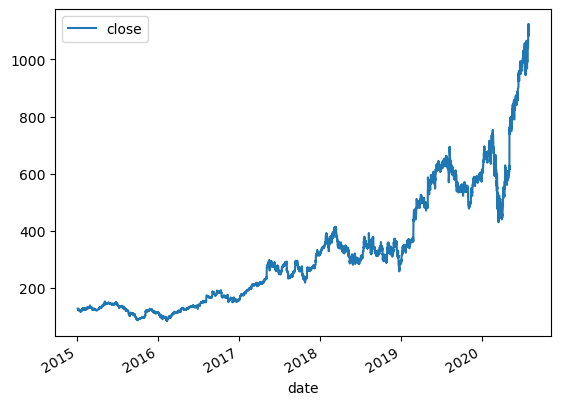

In [13]:
# Visualize the closing price of the df_mercado_stock DataFrame
df_mercado_stock.plot()

In [14]:
# Concatenate the df_mercado_stock DataFrame with the df_mercado_trends DataFrame
# Concatenate the DataFrame by columns (axis=1), and drop and rows with only one column of data
mercado = pd.concat([df_mercado_trends, df_mercado_stock], axis=1)
print(mercado.head())
print(mercado.tail())
print("====================================")
# Check if a row has only one non-null value
row_counts = mercado.notnull().sum(axis=1)
print(row_counts)
print("====================================")
single_column_df = mercado.loc[row_counts > 1]
mercado=single_column_df
print(mercado)
 # View the first and last five rows of the DataFrame
print("====================================")
print(mercado.head())
print(mercado.tail())

                     Search Trends  hour  day  week_of_year   close
2015-01-02 09:00:00            NaN   NaN  NaN          <NA>  127.67
2015-01-02 10:00:00            NaN   NaN  NaN          <NA>  125.44
2015-01-02 11:00:00            NaN   NaN  NaN          <NA>  125.57
2015-01-02 12:00:00            NaN   NaN  NaN          <NA>  125.40
2015-01-02 13:00:00            NaN   NaN  NaN          <NA>  125.17
                     Search Trends  hour      day  week_of_year  close
2020-09-07 20:00:00           71.0  20.0   Monday            37    NaN
2020-09-07 21:00:00           83.0  21.0   Monday            37    NaN
2020-09-07 22:00:00           96.0  22.0   Monday            37    NaN
2020-09-07 23:00:00           97.0  23.0   Monday            37    NaN
2020-09-08 00:00:00           96.0   0.0  Tuesday            37    NaN
2015-01-02 09:00:00    1
2015-01-02 10:00:00    1
2015-01-02 11:00:00    1
2015-01-02 12:00:00    1
2015-01-02 13:00:00    1
                      ..
2020-09-07 20:00

#### Step 2: Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

In [15]:
# For the combined dataframe, slice to just the first half of 2020 (2020-01 through 2020-06) 
mercado=mercado[(mercado.index >= '2020-01-01') & (mercado.index < '2020-07-01')]

# View the first and last five rows of first_half_2020 DataFrame
print(mercado.head())
print(mercado.tail())

                     Search Trends  hour        day  week_of_year  close
2020-01-01 00:00:00           37.0   0.0  Wednesday             1    NaN
2020-01-01 01:00:00           39.0   1.0  Wednesday             1    NaN
2020-01-01 02:00:00            0.0   2.0  Wednesday             1    NaN
2020-01-01 03:00:00            0.0   3.0  Wednesday             1    NaN
2020-01-01 04:00:00            0.0   4.0  Wednesday             1    NaN
                     Search Trends  hour      day  week_of_year  close
2020-06-30 19:00:00           59.0  19.0  Tuesday            27    NaN
2020-06-30 20:00:00           62.0  20.0  Tuesday            27    NaN
2020-06-30 21:00:00           71.0  21.0  Tuesday            27    NaN
2020-06-30 22:00:00           85.0  22.0  Tuesday            27    NaN
2020-06-30 23:00:00           93.0  23.0  Tuesday            27    NaN


array([<Axes: >, <Axes: >], dtype=object)

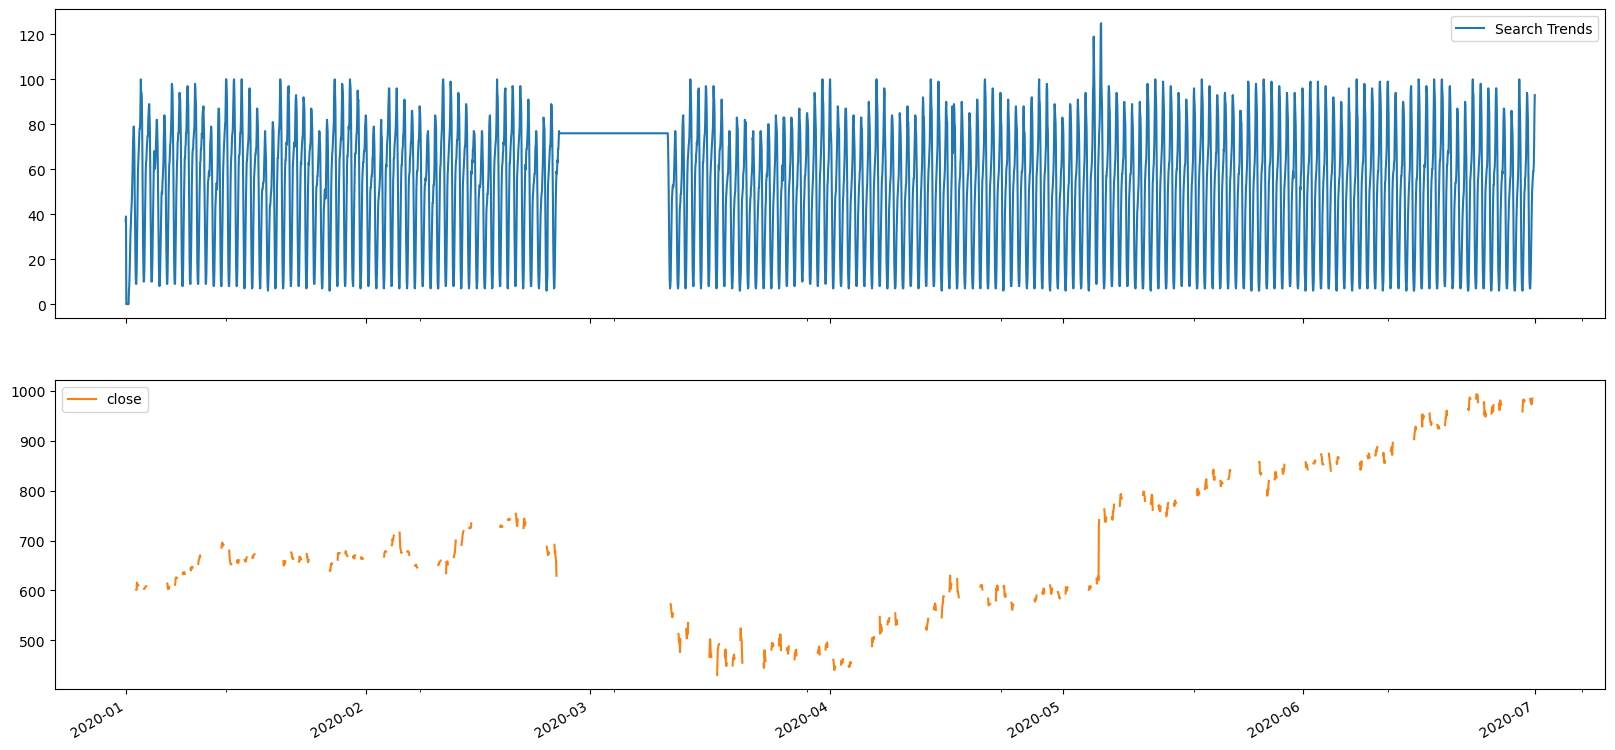

In [16]:
# Visualize the close and Search Trends data
# Plot each column on a separate axes using the following syntax
# `plot(subplots=True)`
try:
    mercado = mercado.drop(columns=['hour','day','week_of_year'])
except KeyError as e:    
    print("Error occurred:", e)
mercado.plot(subplots=True, figsize=(20, 10))

##### Answer the following question:

**Question:** Do both time series indicate a common trend that’s consistent with this narrative?

**Answer:** In may the stock price jumped up in a serious way. Prior to that, the price had fallen dramtically between march and the beginning of May. It is difficult to see any major trends in the search trends, but perhaps it owuld be easier to see with an "average" trend line.

#### Step 3: Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

* “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

* “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis


In [17]:
# Create a new column in the mercado_stock_trends_df DataFrame called Lagged Search Trends
# This column should shift the Search Trends information by one hour
mercado["Lagged Search Trends"] = mercado["Search Trends"].shift(1, freq="H")
mercado.head()

,Search Trends,close,Lagged Search Trends
2020-01-01 00:00:00,37.0,NaN,NaN
2020-01-01 01:00:00,39.0,NaN,37.0
2020-01-01 02:00:00,0.0,NaN,39.0
2020-01-01 03:00:00,0.0,NaN,0.0
2020-01-01 04:00:00,0.0,NaN,0.0


In [18]:
# Create a new column in the mercado_stock_trends_df DataFrame called Stock Volatility
# This column should calculate the standard deviation of the closing stock price return data over a 4 period rolling window
mercado["Return"] = mercado['close'].pct_change()
print(mercado.head())
print("====================================")
mercado["Stock Volatility"] = mercado['Return'].rolling(window=4).std()
print(mercado.head())

                     Search Trends  close  Lagged Search Trends  Return
2020-01-01 00:00:00           37.0    NaN                   NaN     NaN
2020-01-01 01:00:00           39.0    NaN                  37.0     NaN
2020-01-01 02:00:00            0.0    NaN                  39.0     NaN
2020-01-01 03:00:00            0.0    NaN                   0.0     NaN
2020-01-01 04:00:00            0.0    NaN                   0.0     NaN
                     Search Trends  close  Lagged Search Trends  Return  \
2020-01-01 00:00:00           37.0    NaN                   NaN     NaN   
2020-01-01 01:00:00           39.0    NaN                  37.0     NaN   
2020-01-01 02:00:00            0.0    NaN                  39.0     NaN   
2020-01-01 03:00:00            0.0    NaN                   0.0     NaN   
2020-01-01 04:00:00            0.0    NaN                   0.0     NaN   

                     Stock Volatility  
2020-01-01 00:00:00               NaN  
2020-01-01 01:00:00               NaN

/var/folders/3q/99hxw4lx4hlcnzc_c4tymsh80000gn/T/ipykernel_37665/2843246251.py:3: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  mercado["Return"] = mercado['close'].pct_change()


<Axes: >

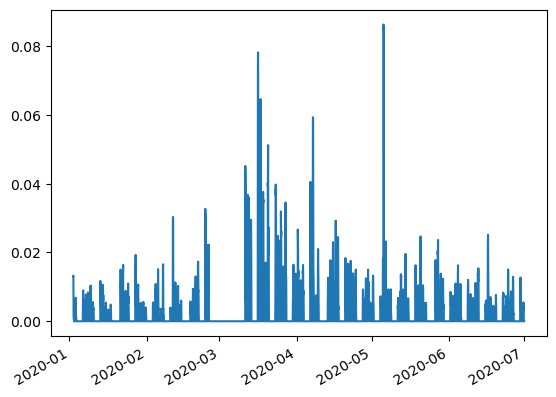

In [19]:
# Visualize the stock volatility
mercado["Stock Volatility"].plot()


**Solution Note:** Note how volatility spiked, and tended to stay high, during the first half of 2020. This is a common characteristic of volatility in stock returns worldwide: high volatility days tend to be followed by yet more high volatility days. When it rains, it pours.

In [20]:
# Create a new column in the mercado_stock_trends_df DataFrame called Hourly Stock Return
# This column should calculate hourly return percentage of the closing price
mercado["Hourly Stock Return"] = mercado['close'].pct_change()
mercado.head()

/var/folders/3q/99hxw4lx4hlcnzc_c4tymsh80000gn/T/ipykernel_37665/1478362205.py:3: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  mercado["Hourly Stock Return"] = mercado['close'].pct_change()


,Search Trends,close,Lagged Search Trends,Return,Stock Volatility,Hourly Stock Return
2020-01-01 00:00:00,37.0,NaN,NaN,NaN,NaN,NaN
2020-01-01 01:00:00,39.0,NaN,37.0,NaN,NaN,NaN
2020-01-01 02:00:00,0.0,NaN,39.0,NaN,NaN,NaN
2020-01-01 03:00:00,0.0,NaN,0.0,NaN,NaN,NaN
2020-01-01 04:00:00,0.0,NaN,0.0,NaN,NaN,NaN


In [21]:
# View the first and last five rows of the mercado_stock_trends_df DataFrame
print(mercado.head())
print(mercado.tail())

                     Search Trends  close  Lagged Search Trends  Return  \
2020-01-01 00:00:00           37.0    NaN                   NaN     NaN   
2020-01-01 01:00:00           39.0    NaN                  37.0     NaN   
2020-01-01 02:00:00            0.0    NaN                  39.0     NaN   
2020-01-01 03:00:00            0.0    NaN                   0.0     NaN   
2020-01-01 04:00:00            0.0    NaN                   0.0     NaN   

                     Stock Volatility  Hourly Stock Return  
2020-01-01 00:00:00               NaN                  NaN  
2020-01-01 01:00:00               NaN                  NaN  
2020-01-01 02:00:00               NaN                  NaN  
2020-01-01 03:00:00               NaN                  NaN  
2020-01-01 04:00:00               NaN                  NaN  
                     Search Trends  close  Lagged Search Trends  Return  \
2020-06-30 19:00:00           59.0    NaN                  59.0     0.0   
2020-06-30 20:00:00           62.

#### Step 4: Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

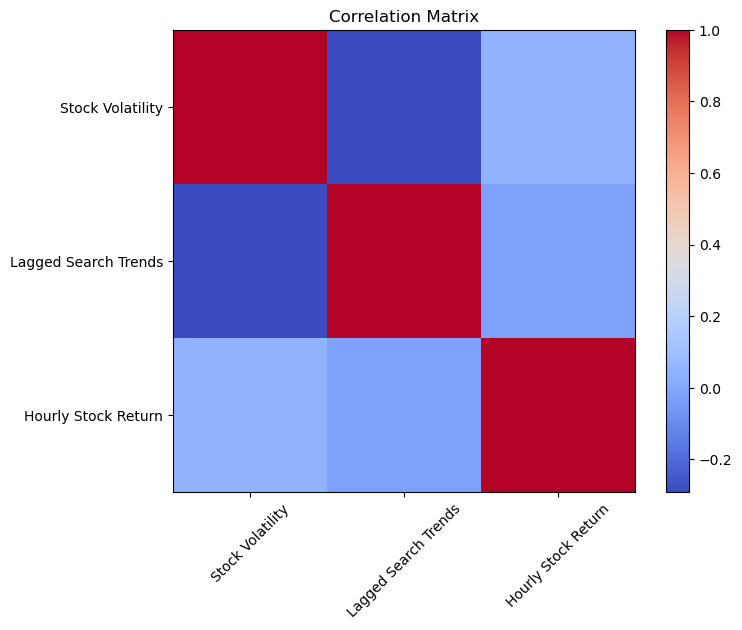

In [22]:
# Construct correlation table of Stock Volatility, Lagged Search Trends, and Hourly Stock Return
columns_of_interest = ["Stock Volatility", "Lagged Search Trends", "Hourly Stock Return"]
subset_df = mercado[columns_of_interest]
correlation_matrix = subset_df.corr()
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Matrix')
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.show()

In [23]:
print(mercado)

                     Search Trends  close  Lagged Search Trends  Return  \
2020-01-01 00:00:00           37.0    NaN                   NaN     NaN   
2020-01-01 01:00:00           39.0    NaN                  37.0     NaN   
2020-01-01 02:00:00            0.0    NaN                  39.0     NaN   
2020-01-01 03:00:00            0.0    NaN                   0.0     NaN   
2020-01-01 04:00:00            0.0    NaN                   0.0     NaN   
...                            ...    ...                   ...     ...   
2020-06-30 19:00:00           59.0    NaN                  59.0     0.0   
2020-06-30 20:00:00           62.0    NaN                  59.0     0.0   
2020-06-30 21:00:00           71.0    NaN                  62.0     0.0   
2020-06-30 22:00:00           85.0    NaN                  71.0     0.0   
2020-06-30 23:00:00           93.0    NaN                  85.0     0.0   

                     Stock Volatility  Hourly Stock Return  
2020-01-01 00:00:00               NaN 

##### Answer the following question:


**Question:** Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

**Answer:** There is a small negative correlation between laffed search trends and stock volatiility. There is a slightly positive correlation between stock price returns and lagged search traffic.

## Step 4: Create a Time Series Model with Prophet

Now, you need to produce a time series model that analyzes and forecasts patterns in the hourly search data. To do so, complete the following steps:

1. Set up the Google search data for a Prophet forecasting model.

2. After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

3. Plot the individual time series components of the model to answer the following questions:

    * What time of day exhibits the greatest popularity?

    * Which day of the week gets the most search traffic?

    * What's the lowest point for search traffic in the calendar year?


#### Step 1: Set up the Google search data for a Prophet forecasting model.

In [24]:
# Using the df_mercado_trends DataFrame, reset the index so the date information is no longer the index
mercado["time"] = mercado.index
mercado = mercado.reset_index(drop=True)
mercado.head()
# Label the columns ds and y so that the syntax is recognized by Prophet
ds = mercado["time"]
y = mercado["Search Trends"]
mercado = pd.concat([ds, y], axis=1)
mercado.columns = ["ds", "y"]
# Drop an NaN values from the prophet_df DataFrame
mercado.dropna(inplace=True)

# View the first and last five rows of the mercado_prophet_df DataFrame
mercado.head()

,ds,y
0,2020-01-01 00:00:00,37.0
1,2020-01-01 01:00:00,39.0
2,2020-01-01 02:00:00,0.0
3,2020-01-01 03:00:00,0.0
4,2020-01-01 04:00:00,0.0


In [25]:
# Call the Prophet function, store as an object
prophet_model = Prophet()

In [26]:
# Fit the time-series model.
prophet_model.fit(mercado)

23:08:32 - cmdstanpy - INFO - Chain [1] start processing
23:08:32 - cmdstanpy - INFO - Chain [1] done processing


In [27]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 2000 hours (approx 80 days)
future_mercado_trends = prophet_model.make_future_dataframe(periods=2000, freq='H')

# View the last five rows of the future_mercado_trends DataFrame
future_mercado_trends.tail()

,ds
6028,2020-09-22 03:00:00
6029,2020-09-22 04:00:00
6030,2020-09-22 05:00:00
6031,2020-09-22 06:00:00
6032,2020-09-22 07:00:00


In [28]:
# Make the predictions for the trend data using the future_mercado_trends DataFrame
forecast_mercado_trends = prophet_model.predict(future_mercado_trends)

# Display the first five rows of the forecast_mercado_trends DataFrame
forecast_mercado_trends.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-01 00:00:00,46.763500,80.129249,96.219671,46.763500,46.763500,41.025464,41.025464,41.025464,39.918138,39.918138,39.918138,1.107327,1.107327,1.107327,0.0,0.0,0.0,87.788964
1,2020-01-01 01:00:00,46.798949,76.191991,91.646141,46.798949,46.798949,37.540535,37.540535,37.540535,36.581836,36.581836,36.581836,0.958699,0.958699,0.958699,0.0,0.0,0.0,84.339484
2,2020-01-01 02:00:00,46.834397,67.167313,84.248815,46.834397,46.834397,28.953206,28.953206,28.953206,28.133199,28.133199,28.133199,0.820007,0.820007,0.820007,0.0,0.0,0.0,75.787603
3,2020-01-01 03:00:00,46.869846,54.461456,71.531425,46.869846,46.869846,15.950534,15.950534,15.950534,15.258385,15.258385,15.258385,0.692150,0.692150,0.692150,0.0,0.0,0.0,62.820380
4,2020-01-01 04:00:00,46.905294,39.045197,55.077867,46.905294,46.905294,0.154758,0.154758,0.154758,-0.421116,-0.421116,-0.421116,0.575874,0.575874,0.575874,0.0,0.0,0.0,47.060052


#### Step 2: After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

/Users/nathanielsena/anaconda3/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/nathanielsena/anaconda3/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


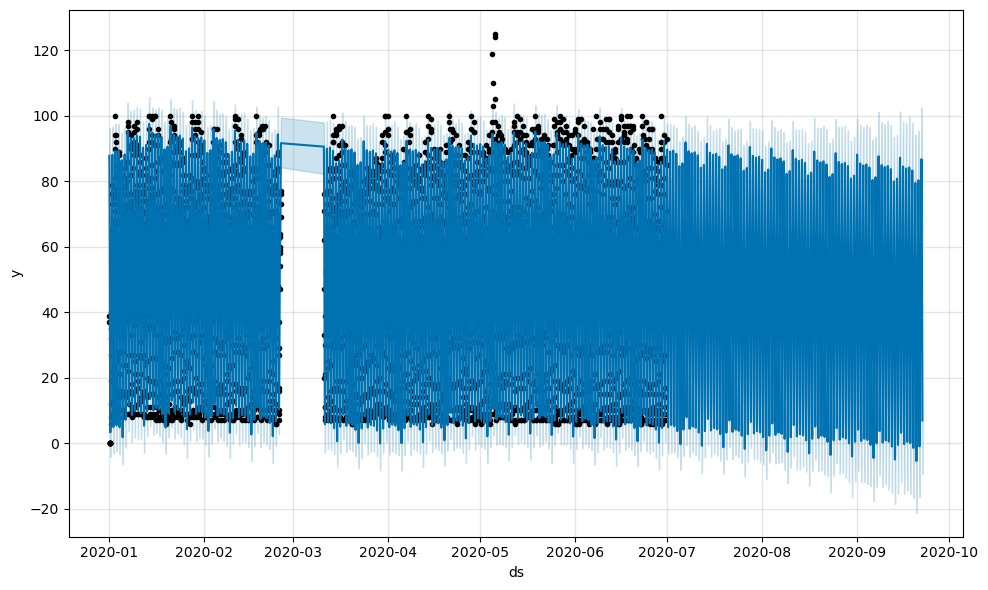

In [29]:
# Plot the Prophet predictions for the Mercado trends data
fig = prophet_model.plot(forecast_mercado_trends)

##### Answer the following question:

**Question:**  How's the near-term forecast for the popularity of MercadoLibre?

**Answer:** It generally looks like it would trend more negative in the short term of 3 months.


#### Step 3: Plot the individual time series components of the model to answer the following questions:

* What time of day exhibits the greatest popularity?

* Which day of the week gets the most search traffic?

* What's the lowest point for search traffic in the calendar year?


In [30]:
# Set the index in the forecast_mercado_trends DataFrame to the ds datetime column
forecast_mercado_trends.set_index('ds', inplace=True)

# View the only the yhat,yhat_lower and yhat_upper columns from the DataFrame
columns_of_interest = ["yhat","yhat_lower","yhat_upper"]
selected_df = forecast_mercado_trends[columns_of_interest]
print(selected_df)


                          yhat  yhat_lower  yhat_upper
ds                                                    
2020-01-01 00:00:00  87.788964   80.129249   96.219671
2020-01-01 01:00:00  84.339484   76.191991   91.646141
2020-01-01 02:00:00  75.787603   67.167313   84.248815
2020-01-01 03:00:00  62.820380   54.461456   71.531425
2020-01-01 04:00:00  47.060052   39.045197   55.077867
...                        ...         ...         ...
2020-09-22 03:00:00  62.203470   47.245429   77.986635
2020-09-22 04:00:00  46.520690   30.693889   62.275769
2020-09-22 05:00:00  30.403333   14.568449   46.662059
2020-09-22 06:00:00  16.494824    0.446353   32.653828
2020-09-22 07:00:00   6.932079   -9.393283   22.172978

[6033 rows x 3 columns]


Solutions Note: `yhat` represents the most likely (average) forecast, whereas `yhat_lower` and `yhat_upper` represents the worst and best case prediction (based on what are known as 95% confidence intervals).

<Axes: xlabel='ds'>

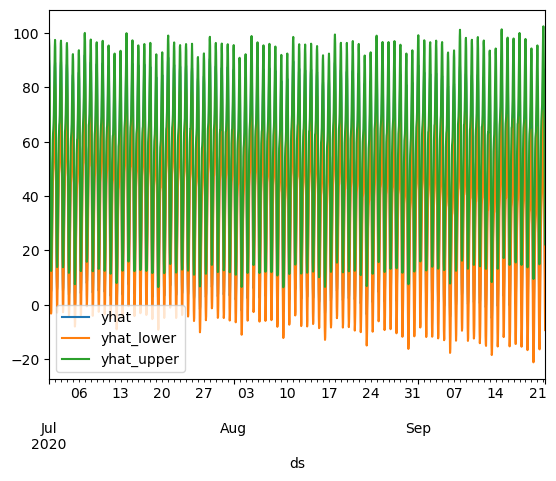

In [31]:
# From the forecast_mercado_trends DataFrame, plot the data to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 2000 hours 
last_two_thousand_hours = forecast_mercado_trends[columns_of_interest].iloc[-2000:]
last_two_thousand_hours.plot()

/Users/nathanielsena/anaconda3/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/nathanielsena/anaconda3/lib/python3.11/site-packages/prophet/plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
/Users/nathanielsena/anaconda3/lib/python3.11/site-packages/prophet/plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects in

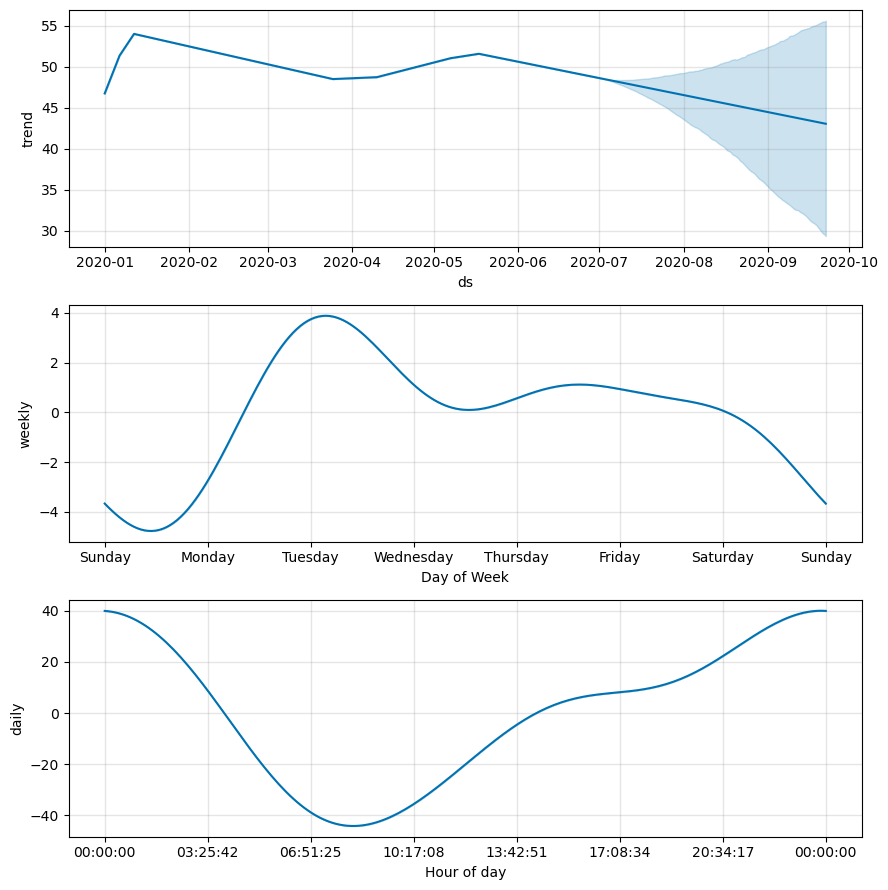

In [32]:
# Reset the index in the forecast_mercado_trends DataFrame
forecast_canada=forecast_mercado_trends.reset_index()

# Use the plot_components function to visualize the forecast results 
# for the forecast_canada DataFrame 
fig = prophet_model.plot_components(forecast_canada)

##### Answer the following questions:

**Question:** What time of day exhibits the greatest popularity?

**Answer:** Midnight

**Question:** Which day of week gets the most search traffic? 
   
**Answer:** Tuesday

**Question:** What's the lowest point for search traffic in the calendar year?

**Answer:** 
